In [3]:
# ==========================================
# Random Forest
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text, plot_tree

In [4]:
df = pd.read_csv('/content/Biscobis.csv')
df.head()

,ident,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,0,32,4.2,1,0,1,1
1,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,0,58,6.8,1,0,1,3
2,7,4.6,2.4,9.5,6.6,3.5,4.5,7.6,0,46,5.8,1,0,1,1
3,9,5.5,1.6,9.4,4.7,3.5,3.0,7.6,0,63,5.4,1,0,1,3
4,11,2.4,1.6,8.8,4.8,2.0,2.8,5.8,0,32,4.3,1,0,0,1


In [5]:
# ==========================================
# 2. Separação em treino e teste
# ==========================================
X = df[["x1","x2","x3","x4","x5","x6","x7"]]
y = df["x11"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [6]:
# ==========================================
# 3. Modelo Random Forest
# ==========================================
modelo_rf = RandomForestClassifier(
    n_estimators=100,   # número de árvores
    max_depth=6,        # profundidade máxima
    min_samples_split=5,
    random_state=42
)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=5, random_state=42)


Acurácia: 1.0

Matriz de Confusão:
 [[12  0]
 [ 0 18]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



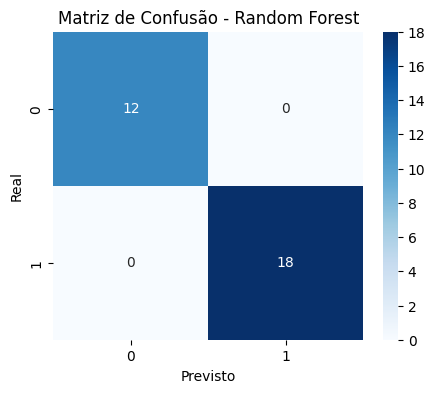

In [7]:
# ==========================================
# 4. Avaliação
# ==========================================
y_pred = modelo_rf.predict(X_test)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Heatmap matriz de confusão
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

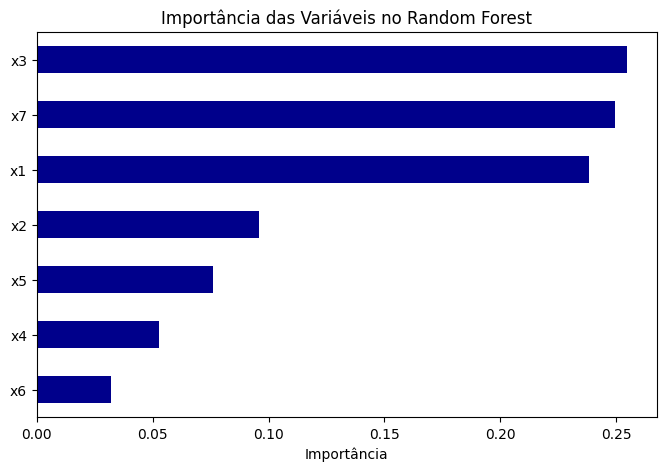


Importância das Variáveis:
x3    0.254878
x7    0.249532
x1    0.238508
x2    0.096027
x5    0.076068
x4    0.052789
x6    0.032198
dtype: float64

Importância das Variáveis:
x3    0.254878
x7    0.249532
x1    0.238508
x2    0.096027
x5    0.076068
x4    0.052789
x6    0.032198
dtype: float64


In [8]:

# ==========================================
# 5. Importância das Variáveis
# ==========================================
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importancias.plot(kind="barh", color="darkblue")
plt.title("Importância das Variáveis no Random Forest")
plt.xlabel("Importância")
plt.show()

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))
